In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from model import train_keras_model
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

#### Import data and train model

In [3]:
from mnist import MNIST

mnist = MNIST('MNIST')

x_train, y_train = mnist.load_training() # 60000 samples
x_test, y_test = mnist.load_testing() # 10000 samples

In [4]:
x_train = np.asarray(x_train).astype(np.float32)
y_train_int = np.asarray(y_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.float32)
y_test_int = np.asarray(y_test).astype(np.int32)

from keras.utils import to_categorical

y_train = to_categorical(y_train_int)
y_test = to_categorical(y_test_int)

Using TensorFlow backend.


In [5]:
x_train.reshape(len(x_train), 28, 28, 1).shape

(60000, 28, 28, 1)

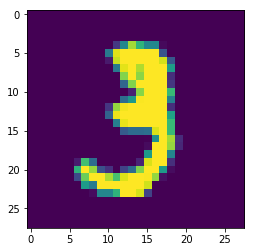

In [6]:
plt.imshow(x_train[10].reshape(28, 28))

In [13]:
from model import train_keras_conv, train_keras_ann

model = train_keras_ann(x_train, y_train, 20)
#model = train_keras_conv(x_train.reshape(len(x_train), 28, 28, 1), y_train, 5)

Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 166.4082 - accuracy: 0.1068
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 2.3015 - accuracy: 0.1121
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 2.3016 - accuracy: 0.1126
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 2.3013 - accuracy: 0.1123
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 2.3013 - accuracy: 0.1123
Epoch 8/20
60000/60000 [==============================] - 3s 52us/step - loss: 2.3013 - accuracy: 0.1123
Epoch 9/20
60000/60000 [==============================] - 3s 56us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/20
60000/60000 [============================

### Evaluate model

In [14]:
"""loss_and_metrics = model.evaluate(x_test.reshape(len(x_test), 28, 28, 1), y_test, batch_size=32)
classes = model.predict_classes(x_test.reshape(len(x_test), 28, 28, 1), batch_size=32)
proba = model.predict_proba(x_test.reshape(len(x_test), 28, 28, 1), batch_size=32)"""
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
classes = model.predict_classes(x_test, batch_size=32)
proba = model.predict_proba(x_test, batch_size=32)

10000/10000 [==============================] - 0s 25us/step


In [15]:
loss_and_metrics

[2.301112740325928, 0.11349999904632568]

In [16]:
classes[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
y_test_int[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int32)